In [37]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sn
import torch
from sklearn.preprocessing import StandardScaler

In [38]:
treino = torch.load("data/treino_particle.pt")
teste = torch.load("data/teste_particle.pt")

In [39]:
'''
y_treino = treino[:,-1]
y_teste = teste[:,-1]
y_treino= y_treino.unsqueeze(1)
y_teste= y_teste.unsqueeze(1)
'''

'\ny_treino = treino[:,-1]\ny_teste = teste[:,-1]\ny_treino= y_treino.unsqueeze(1)\ny_teste= y_teste.unsqueeze(1)\n'

# Normalizando

In [40]:
'''
sc = StandardScaler()
treino = torch.tensor(sc.fit_transform(treino[:,0:-1]))
teste = torch.tensor(sc.transform(teste[:,0:-1]))
'''

'\nsc = StandardScaler()\ntreino = torch.tensor(sc.fit_transform(treino[:,0:-1]))\nteste = torch.tensor(sc.transform(teste[:,0:-1]))\n'

In [41]:
treino

tensor([[ 3.9160e+02, -9.7961e+01,  7.5106e+01,  ...,  1.8292e-01,
          6.1232e-17,  0.0000e+00],
        [ 1.3397e+02, -3.2448e+01,  2.5297e+01,  ...,  1.8050e-01,
         -6.1123e-03,  0.0000e+00],
        [ 5.3386e+01, -1.4496e+01,  9.7303e+00,  ...,  1.7324e-01,
          2.1929e-03,  0.0000e+00],
        ...,
        [ 8.0492e-01,  2.8352e+00,  1.7614e+00,  ...,  5.1301e-01,
          1.9984e-02,  1.0000e+00],
        [ 1.0924e+00,  2.1532e+00,  1.7469e+00,  ...,  5.8618e-01,
         -5.9991e-02,  1.0000e+00],
        [ 1.0263e+00,  2.0824e+00,  1.7682e+00,  ...,  6.0591e-01,
         -3.1690e-02,  1.0000e+00]])

In [42]:
'''
treino = torch.cat((treino, y_treino), dim=1)
teste = torch.cat((teste, y_teste), dim=1)
'''

'\ntreino = torch.cat((treino, y_treino), dim=1)\nteste = torch.cat((teste, y_teste), dim=1)\n'

In [43]:
teste

tensor([[ 8.5004e+01,  1.6157e+01, -3.2293e+01,  ..., -3.4966e-01,
          6.1232e-17,  0.0000e+00],
        [ 6.8933e+01,  2.5327e+01, -2.8452e+01,  ..., -3.6126e-01,
         -3.7135e-15,  0.0000e+00],
        [ 5.4621e+01,  1.9800e+01, -2.3768e+01,  ..., -3.7864e-01,
         -2.0406e-02,  0.0000e+00],
        ...,
        [-2.2290e+00, -1.5002e+00,  1.6843e+00,  ...,  5.3114e-01,
          1.5777e-02,  1.0000e+00],
        [-2.3167e+00, -1.1995e+00,  1.8256e+00,  ...,  5.7335e-01,
         -1.9727e-02,  1.0000e+00],
        [-1.0322e+00, -5.5420e-01,  8.4138e-01,  ...,  5.8333e-01,
         -3.7522e-02,  1.0000e+00]])

# DataLoader

In [44]:
from torch.utils.data import Dataset, DataLoader

In [45]:
class CustomDataset(Dataset):
    def __init__(self, data_tensor, transform=None):
        self.data = data_tensor
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Obtendo as features e a label (target) da linha idx do tensor
        image = self.data[idx, 0:-1]
        label = self.data[idx, -1].long()

        # Aplicando transformações, se necessário
        if self.transform:
            image = self.transform(image)

        return image, label


In [46]:
dataset_treino = CustomDataset(treino)
dataset_teste = CustomDataset(teste)

In [47]:
dataset_treino.__getitem__(1)

(tensor([ 1.3397e+02, -3.2448e+01,  2.5297e+01,  1.4015e+02,  1.1261e-01,
          1.3785e+02,  1.1308e-01,  1.8250e-01, -8.5472e-03, -6.1123e-03,
         -2.3762e-01,  4.0606e-03, -5.0193e-03,  9.4628e-03,  1.8050e-01,
         -6.1123e-03]),
 tensor(0))

## Treino

In [48]:
batch_size = 128  
train_dataloader = DataLoader(dataset_treino, batch_size=batch_size, shuffle=True)

## Teste

In [49]:
batch_size = 128  
test_dataloader = DataLoader(dataset_teste, batch_size=batch_size, shuffle=True)

# Modelo

In [50]:
from torch import nn

In [51]:
class MLPClassification(nn.Module):
  def __init__(self,entrada):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(entrada,1300),
        nn.ReLU(),
        nn.Linear(1300,700),
        nn.ReLU(),
        nn.Linear(700,350),
        nn.ReLU(),
        nn.Linear(350,200),
        nn.ReLU(),
        nn.Linear(200,50),
        nn.ReLU(),
        nn.Linear(50,1),
        nn.Sigmoid()
    )
  def forward(self,x):
    return self.layers(x)
  

In [52]:
entrada = 16 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [53]:
model = MLPClassification(entrada).to(device)

In [54]:
model

MLPClassification(
  (layers): Sequential(
    (0): Linear(in_features=16, out_features=1300, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1300, out_features=700, bias=True)
    (3): ReLU()
    (4): Linear(in_features=700, out_features=350, bias=True)
    (5): ReLU()
    (6): Linear(in_features=350, out_features=200, bias=True)
    (7): ReLU()
    (8): Linear(in_features=200, out_features=50, bias=True)
    (9): ReLU()
    (10): Linear(in_features=50, out_features=1, bias=True)
    (11): Sigmoid()
  )
)

# Função de Custo

In [55]:
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)
#lossfunction = nn.BCEWithLogitsLoss()
lossfunction = nn.BCELoss()

# Função Treino e Teste

In [56]:
def train(modelo,dataloader,funcao_de_custo,otimizador):
  modelo.train() # praparado para ser treinado
  erro_acumulativo = 0.0
  for _, (data, target) in enumerate(dataloader):
    target, datas =  target.float().to(device), data.float().to(device)
    pred = modelo(datas)
    perda = funcao_de_custo(pred,target.unsqueeze(1).to(device))

    otimizador.zero_grad() # zero os gradientes acumulados
    perda.backward() #Calculo da gradiente
    otimizador.step() # anda para a direção de menos erro

    erro_acumulativo += perda.item()
  return erro_acumulativo/len(dataloader)


def test(modelo, dataloader, funcao_de_custo):
    modelo.eval()  
    total_acertos = 0
    total_exemplos = 0
    total_loss = 0.0

    with torch.no_grad():  
        for _, (data, target) in enumerate(dataloader):
            target, datas = target.float().to(device), data.float().to(device)

            pred = modelo(datas)
            loss = funcao_de_custo(pred, target.unsqueeze(1).to(device))

            # Arredonda as previsões para o valor mais próximo (0 ou 1)
            pred_labels = torch.round(pred)

            # Calcula o número de acertos
            total_acertos += (pred_labels == target.unsqueeze(1).to(device)).sum().item()
            total_exemplos += target.size(0)
            total_loss += loss.item()

    #accuracy = total_acertos / total_exemplos
    avg_loss = total_loss / len(dataloader)

    return  avg_loss

# Treinando o Modelo

In [57]:
vezes_treinando = 150
for t in range(vezes_treinando):
  train_erro = train(model,train_dataloader,lossfunction,optimizer)
  if t %100 ==0:
    print(f"Epoca {t}; erro : {train_erro}")
  test_erro = test(model,test_dataloader,lossfunction)
print(f"erro : {test_erro}")

Epoca 0; erro : 0.46457931474494935
Epoca 100; erro : 2.7360502971159617


In [ ]:
caminho_arquivo = 'model/2420_neuronios_adam.pth'

# Salvar o modelo
torch.save(model.state_dict(), caminho_arquivo)

# Metricas

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(modelo, dataloader):
    modelo.eval()  # Define o modelo para o modo de avaliação
    all_labels = []
    all_probs = []

    with torch.no_grad():  # Desliga o cálculo de gradientes para economizar memória e acelerar o processo
        for _, (data, target) in enumerate(dataloader):
            target, imgs = target.float().to(device), data.float().to(device)

            pred_probs = torch.sigmoid(modelo(imgs)).cpu().numpy()  # Probabilidades previstas pelo modelo
            all_probs.extend(pred_probs)
            all_labels.extend(target.cpu().numpy())

    fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()



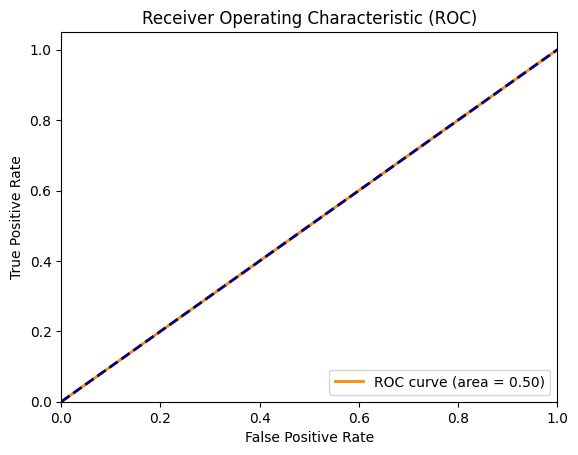

In [ ]:
plot_roc_curve(model, test_dataloader)

In [ ]:
train_dataloader.__getitem__

AttributeError: 'DataLoader' object has no attribute '__getitem__'

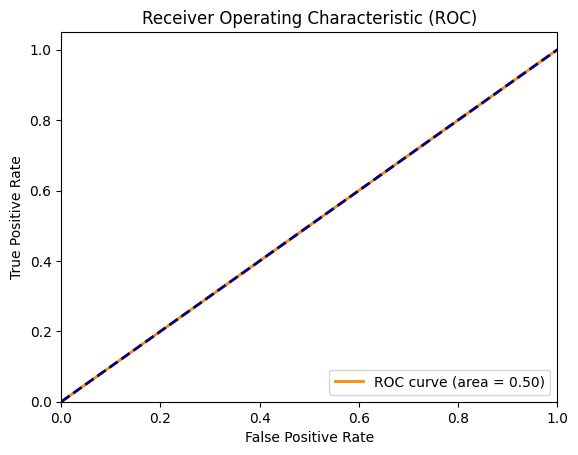

In [ ]:
plot_roc_curve(model, train_dataloader)